# **K-means on images**

Use the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)


In [1]:
#Image segmentation from video using OpenCV and K-means clustering
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [112]:
def img_segmentation(img, n_segmentation, model, color_space ):

  # Tipe color space
  if color_space == 'RGB':
    img_ = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    vectorized_ = img_rgb.reshape([-1, 3])
    vectorized_ = np.float32(vectorized_)

  if color_space == 'HSV':
    img_ = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV_FULL)
    vectorized_ = img_hsv[:, :, 0].reshape([-1, 1])
    vectorized_ = np.float32(vectorized_)

  # Train models
  if model == 'KMeans':
    from sklearn.cluster import KMeans
    model_ = KMeans(n_clusters = n_segmentation, random_state=0)
    model.fit( vectorized_ )

  # Predict to segment regions
  clustered_ = model_.predict( vectorized_ )
  clustered_ = clustered_.reshape( [img_.shape[0], img_.shape[1]] )

  # clustered_rgb = kmeans.predict( vectorized_rgb )
  # clustered_rgb = clustered_rgb.reshape( [img_rgb.shape[0], img_rgb.shape[1]] )

  #show all grphics
  #first show original and mask segmentation
  _, axes = plt.subplots (1, 2, figsize = (12,6))
  axes[0].imshow( img_ ), axes[0].set_axis_off(), axes[0].set_title("Original")
  axes[1].imshow( clustered_ ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
  plt.tight_layout()

  #Show all clusters
  cluster = 0

  for cluster in range(n):
    cluster_mask = np.array ( clustered_rgb == cluster , dtype = np.uint8)

    masked_image = np.copy(img_rgb)
    masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

    _, axes = plt.subplots (1, 3, figsize = (12,5))
    axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title(f"Original cluster = {cluster}")
    axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title(f"Cluster mask cluster = {cluster}")
    axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title(f"Segmentation cluster = {cluster}")
    plt.tight_layout()



In [113]:
original_image = cv2.imread('/content/image1.jpeg')
img_segmentation(original_image, 2, KMeans, 'RGB')

UnboundLocalError: cannot access local variable 'model_' where it is not associated with a value

(524, 700, 3) 366800


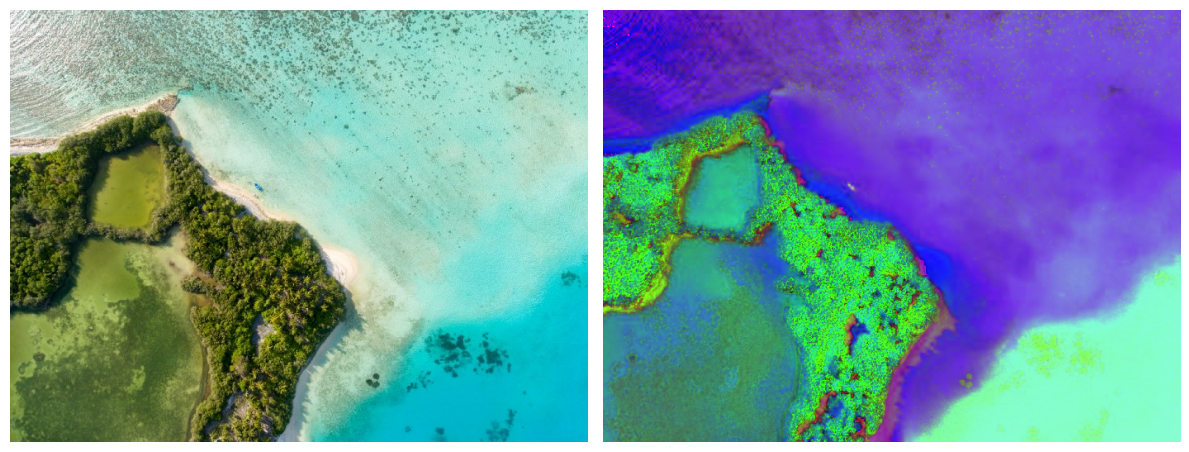

In [57]:
original_image = cv2.imread('/content/image1.jpeg')
# original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Resize to a feasible size to avoid extensive computation
# original_image = cv2.resize(original_image, (128, 128))

# Convert from BGR Color Space to HSV
img_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV_FULL)

_, axes = plt.subplots (1, 2, figsize = (12,6))
axes[0].imshow( img_rgb ), axes[0].set_axis_off() #RGB
axes[1].imshow( img_hsv ), axes[1].set_axis_off() #HSV

print(img_rgb.shape, img_rgb.shape[0]*img_rgb.shape[1])

plt.tight_layout()

In [58]:
# Vectorize to compute kmeans
vectorized_rgb = img_rgb.reshape([-1, 3])
vectorized_rgb = np.float32(vectorized_rgb)

vectorized_hsv = img_hsv[:, :, 0].reshape([-1, 1])
vectorized_hsv = np.float32(vectorized_hsv)

# Check both vector sizes
print(vectorized_rgb.shape, vectorized_hsv.shape)

(366800, 3) (366800, 1)


## **RGB image**

In [93]:
# Train kmeans
n = 2
kmeans = KMeans(n_clusters = n, random_state=0)
kmeans.fit( vectorized_rgb )

KMeans(n_clusters=2, random_state=0)

In [94]:
# Predict to segment regions
clustered_rgb = kmeans.predict( vectorized_rgb )
clustered_rgb = clustered_rgb.reshape( [img_rgb.shape[0], img_rgb.shape[1]] )

print(vectorized_rgb.shape, img_rgb.shape, clustered_rgb.shape)

(366800, 3) (524, 700, 3) (524, 700)


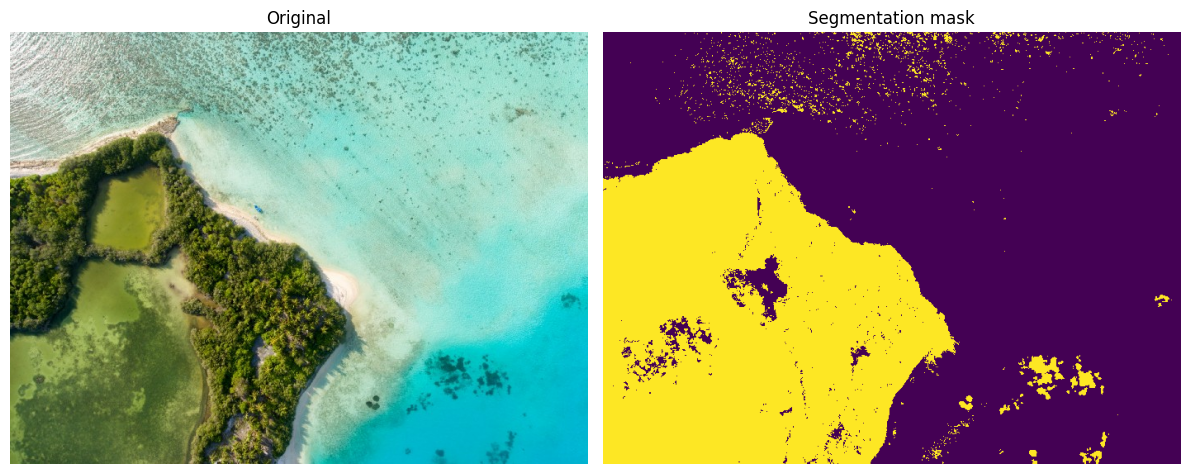

In [95]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (12,6))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_rgb ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

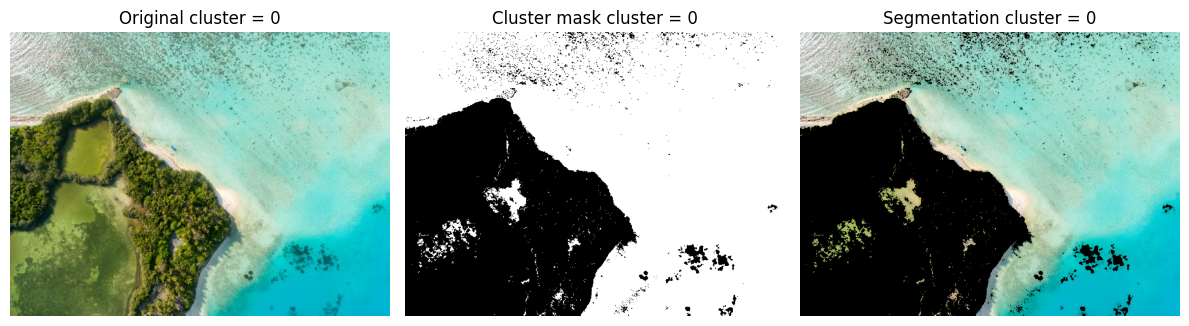

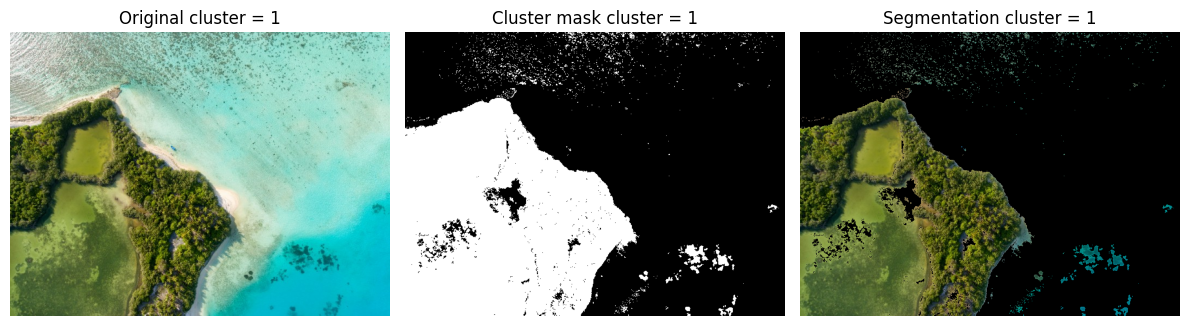

In [96]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 0

for cluster in range(n):
  cluster_mask = np.array ( clustered_rgb == cluster , dtype = np.uint8)

  masked_image = np.copy(img_rgb)
  masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

  _, axes = plt.subplots (1, 3, figsize = (12,5))
  axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title(f"Original cluster = {cluster}")
  axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title(f"Cluster mask cluster = {cluster}")
  axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title(f"Segmentation cluster = {cluster}")
  plt.tight_layout()

## **HSV image**

In [87]:
# Train kmeans
n = 4
kmeans = KMeans(n_clusters = n, random_state=0)
kmeans.fit( vectorized_hsv )

KMeans(n_clusters=4, random_state=0)

In [88]:
# Predict to segment regions
clustered_hsv = kmeans.predict( vectorized_hsv )
clustered_hsv = clustered_hsv.reshape( [img_hsv.shape[0], img_hsv.shape[1]] )

print(vectorized_hsv.shape, img_rgb.shape, clustered_hsv.shape)

(366800, 1) (524, 700, 3) (524, 700)


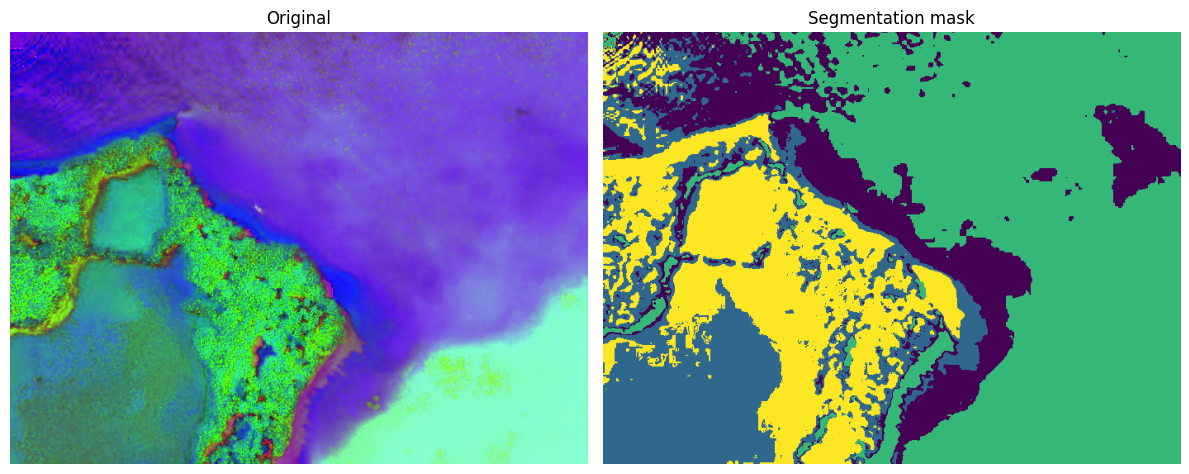

In [89]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow( img_hsv ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_hsv ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

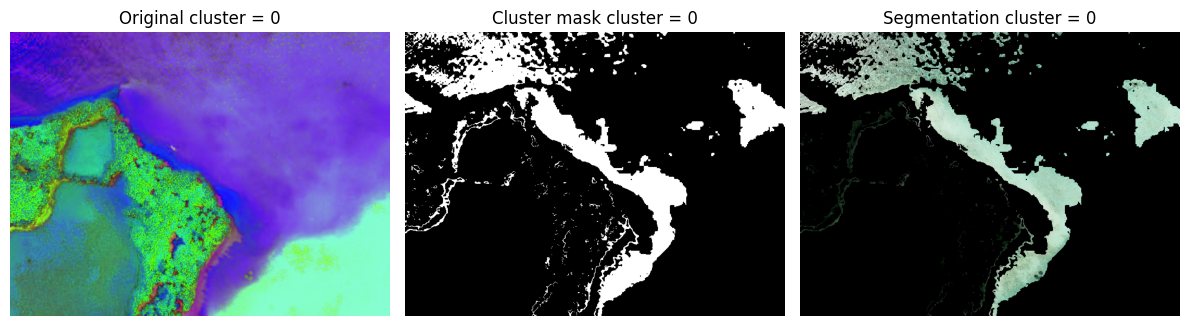

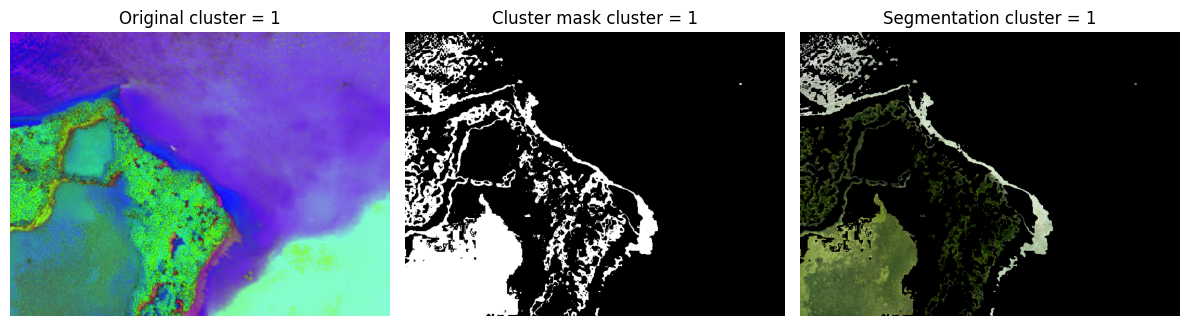

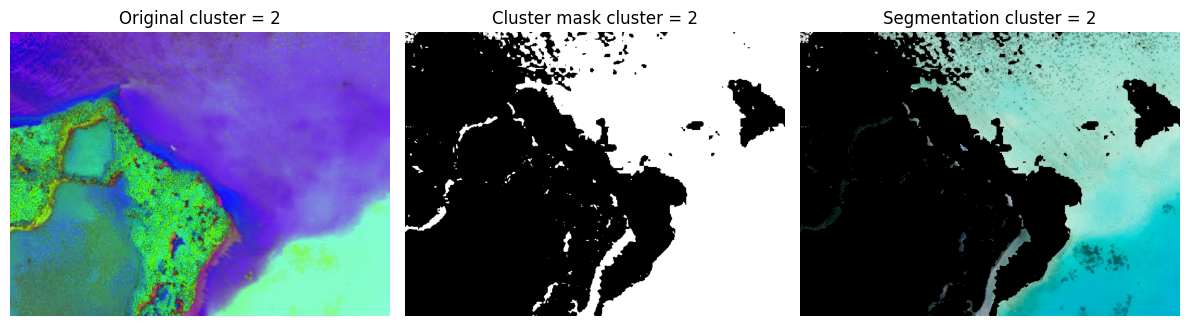

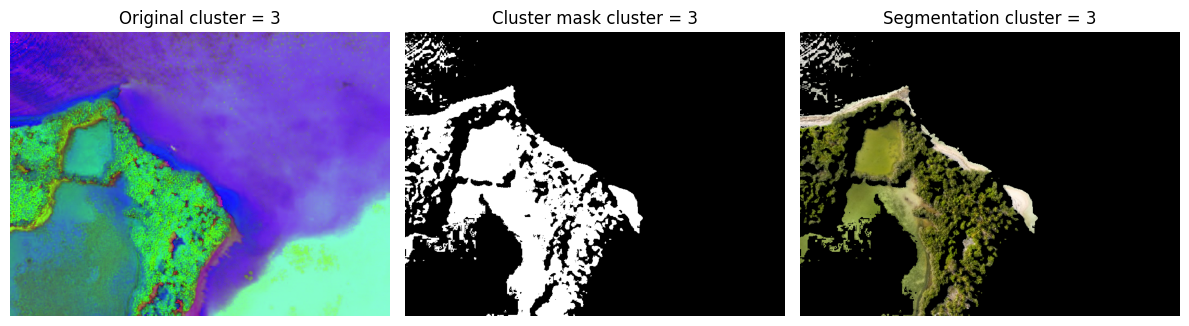

In [90]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 0

for cluster in range(n):

  cluster_mask = np.array ( clustered_hsv == cluster , dtype = np.uint8)

  masked_image = np.copy(img_rgb)
  masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

  _, axes = plt.subplots (1, 3, figsize = (12,5))
  axes[0].imshow( img_hsv ), axes[0].set_axis_off(), axes[0].set_title(f"Original cluster = {cluster}")
  axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title(f"Cluster mask cluster = {cluster}")
  axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title(f"Segmentation cluster = {cluster}")
  plt.tight_layout()

## **Comparison**

In [ ]:
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow(clustered_rgb, cmap="Paired"), axes[0].set_axis_off(), axes[0].set_title("Segmentation RGB")
axes[1].imshow(clustered_hsv, cmap="Paired"), axes[1].set_axis_off(), axes[1].set_title("Segmentation HSV")
plt.tight_layout()

In [ ]:
# Mask clusters (turn the rest of pixels into black)
cluster = 0
cluster_mask_rgb = np.array ( _ , dtype = np.uint8)

cluster = 0
cluster_mask_hsv = np.array ( _ , dtype = np.uint8)

masked_rgb = np.copy(img_rgb)
masked_rgb = cv2.bitwise_and(masked_rgb, masked_rgb, mask = _ )

masked_hsv = np.copy(img_rgb)
masked_hsv = cv2.bitwise_and(masked_hsv, masked_hsv, mask = _ )

_, axes = plt.subplots (1, 3, figsize = (18,8))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(masked_rgb), axes[1].set_axis_off(), axes[1].set_title("RGB Segmentation")
axes[2].imshow(masked_hsv), axes[2].set_axis_off(), axes[2].set_title("HSV Segmentation")
plt.tight_layout()

# **Elbow and Silhouette**

Perform an analysis based on elbow and silhouette to determine the best number of clusters

# **In random images**


Repeat the segmentation with the following images:
 - [fr1.png](https://drive.google.com/file/d/18OR0DEx-rXeVBeqgbZqhzXXyOQhMyefb/view?usp=sharing)
 - [fr2.png](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr3.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr4.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
